In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from scipy import stats
from scipy.stats.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D

In [6]:
def plot_s(s):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(7,3))

    ax1.plot(s)
    ax1.set_xlabel('i')
    ax1.set_ylabel('sigma_i')
    ax1.set_title('singular values')

    # get variance
    variance_list = []
    for i in range(len(s)):
        variance_list.append(s[i]**2/np.sum(s**2))
    
    ax2.plot(variance_list, 'o-')
    ax2.set_xlabel('principal component')
    ax2.set_ylabel('% variance')
    ax2.set_title('% variance')
    
    ax3.plot(variance_list[:10], 'o-')
    ax3.set_xlabel('principal component')
    ax3.set_ylabel('% variance')
    ax3.set_title('% var for first 10 PC')

In [7]:
# load original data 
data = np.load('data_zscored.npy')

In [8]:
def data_plot(data):
    # SVD the data matrix 
    u, s, vh = np.linalg.svd(data, full_matrices=False)
    
    plot_s(s)
    
    PC3 = np.zeros((3, data.shape[1]))
    for i in range(3):
        PC3[i,:] = vh[i,:]*s[i]
        
    return PC3

In [42]:
def plot_PC3(PC3):
    plt.figure()
    l = PC3.shape[1]
    time = np.arange(0,81,81/l)
    for i in range(3):
        plt.plot(time, PC3[i, :], alpha=1.0-0.3*i, label='PC'+str(i))
    plt.legend()
    plt.xlabel('time (sec)')
    plt.ylabel('PC')
    plt.title('First three PCs')

In [81]:
def plot_PC_1(PC3, t_end=150):
    t_start = 0

    x = PC3[0,t_start:t_end]
    y = PC3[1,t_start:t_end]
    n = len(x)

    # Your colouring array
    T=np.linspace(0,1,np.size(x))**2
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Segement plot and colour depending on T
    s = 10 # Segment length
    for i in range(0,n,s):
        ax.plot(x[i:i+s+1],y[i:i+s+1],color=(0.0,0.5,T[i]))
    ax.scatter(x[0], y[0], label='t=0 sec', color=(0.0,0.5,T[0]))
    ax.scatter(x[-1], y[-1], label='t=5 sec', color=(0.0,0.5,T[-1]))
    plt.title('Trajectory for first 2 PC in the first 5 sec')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()

In [82]:
def plot_PC_02(PC3, t_end=150):
    t_start = 0
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    x = PC3[0,t_start:t_end]
    n = len(x)
    T=np.linspace(0,1,np.size(x))**2
    s = 10 # Segment length
    for i in range(0,n,s):
        ax.plot(PC3[0,i:i+s+1], PC3[1,i:i+s+1], PC3[2,i:i+s+1], color=(0.0,0.5,T[i]))
    ax.scatter(PC3[0,t_start], PC3[1,t_start], PC3[2,t_start], label='t=0 sec', color=(0.0,0.5,T[0]))
    ax.scatter(PC3[0,t_end-t_start-1], PC3[1,t_end-t_start-1], PC3[2,t_end-t_start-1], label='t=5 sec', color=(0.0,0.5,T[-1]))
    plt.legend()

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Trajectory for first 3 PC in the first 5 sec')

In [83]:
def plot_all_PC(data_file, t_end, run_zed = run):
    data = np.load(data_file)
    PC3 = data_plot(data)
    plot_PC3(PC3)
    plot_PC_1(PC3, t_end)
    plot_PC_02(PC3, t_end)
    
    run_zed = run_zed.reshape((len(PC3[0,:]), -1))
    run_zed = np.mean(run_zed, 1)
    for i in range(3):
        cov = pearsonr(run_zed, PC3[i,:])[0]
        print('PC'+str(i)+': '+str(cov))

In [84]:
run = np.load('run_zscored.npy')

In [85]:
ls

01_PCA_data_z-score.ipynb        11.png             finalp2.py
01.png                           12.png             finalp.py
02_PCA_temporal_smoothing.ipynb  13.png             Gau_smoothed_001.npy
02.png                           14.png             Gau_smoothed_01.npy
03_PCA.ipynb                     15.png             key.csv*
03.png                           16.png             neuron_delete_ind.npy
04_by_area.ipynb                 17.png             run_ave.npy
04.png                           18.png             runing_speed.npy*
05_PCA_plot.ipynb                1_bin_trial.ipynb  run_zscored.npy
05.png                           2_all_data.ipynb   trial_10.npy
06.png                           activity.npy*      trial_5.npy
07.png                           area_list_384.npy  trial.npy
08.png                           data_bin_10.npy    try_0_visualize_data.ipynb
09.png                           data_bin_5.npy     unused_code .ipynb
0_get_trial.ipynb                data.npy
10.png    

PC0: -0.3427161317559347
PC1: 0.27136326267553856
PC2: 0.17318044057513313


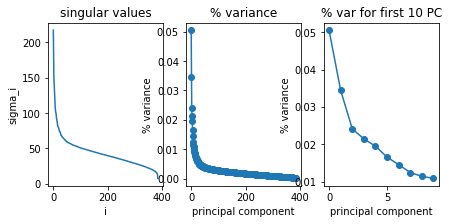

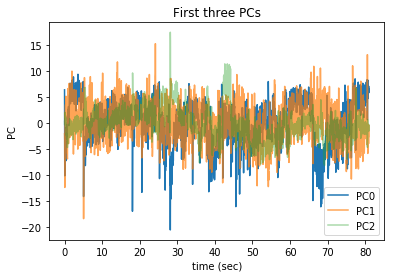

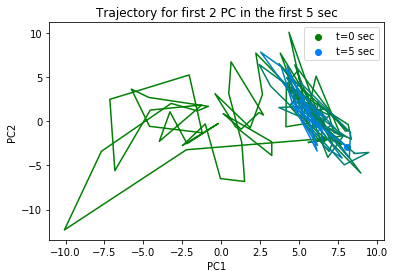

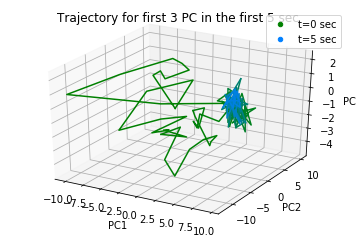

In [86]:
plot_all_PC('data_zscored.npy', t_end=150)

PC0: -0.38929219848841035
PC1: 0.44937223005373284
PC2: -0.3833019286776914


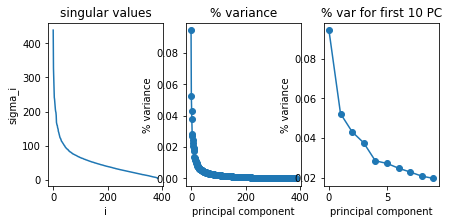

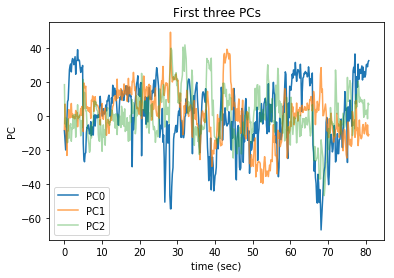

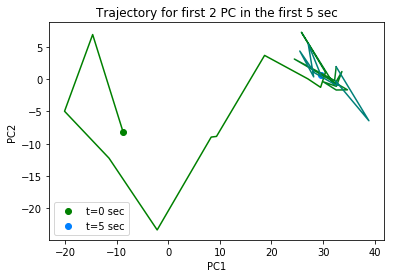

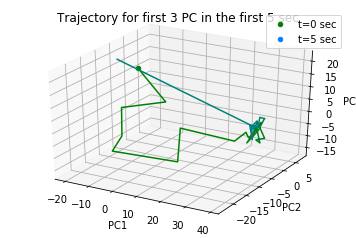

In [87]:
plot_all_PC('data_bin_5.npy', t_end=30)

PC0: 0.41128599440265323
PC1: -0.43547007559009815
PC2: -0.42824477222493895


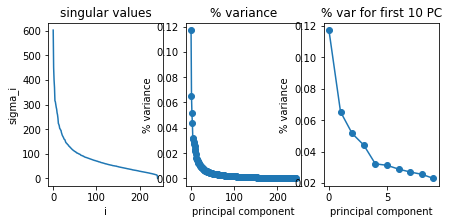

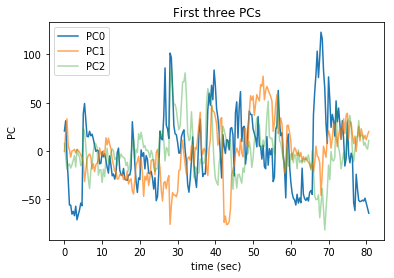

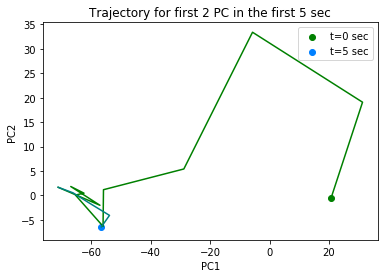

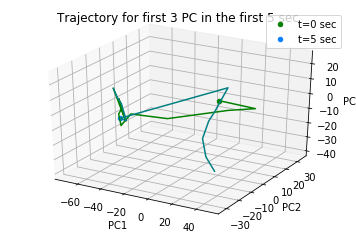

In [88]:
plot_all_PC('data_bin_10.npy', t_end=15)

PC0: -0.436870635776971
PC1: -0.4594772858133892
PC2: 0.4202007392641546


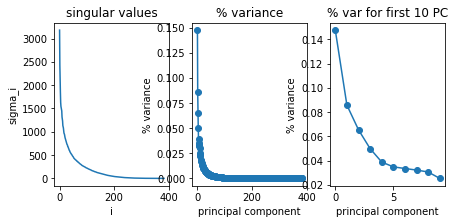

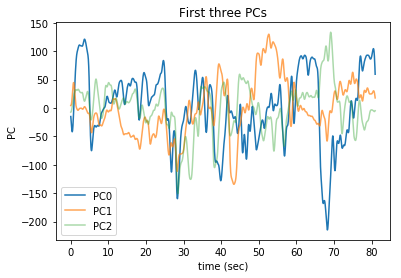

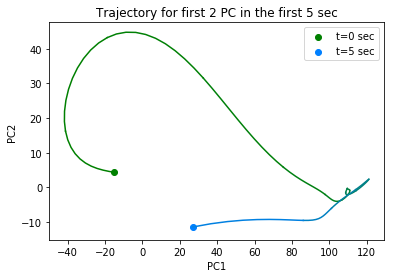

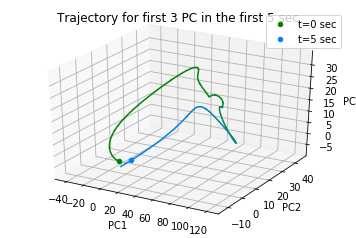

In [90]:
plot_all_PC('Gau_smoothed_001.npy', t_end=150)

PC0: -0.3980136069639942
PC1: -0.43525027820214685
PC2: -0.41799301497502434


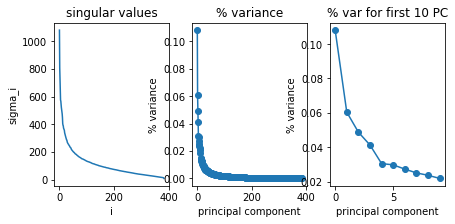

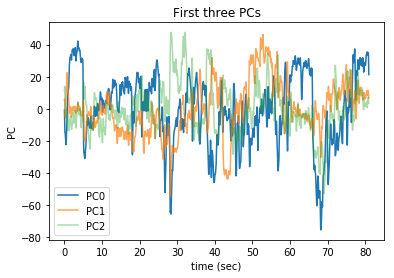

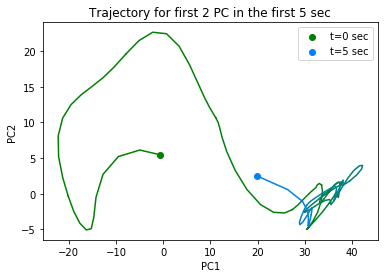

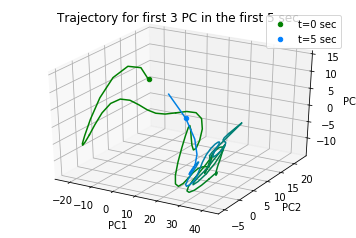

In [93]:
plot_all_PC('Gau_smoothed_01.npy', t_end=150)

PC0: -0.4074086929579095
PC1: -0.4350121633013316
PC2: -0.4320325460706861


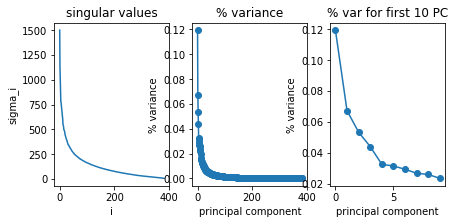

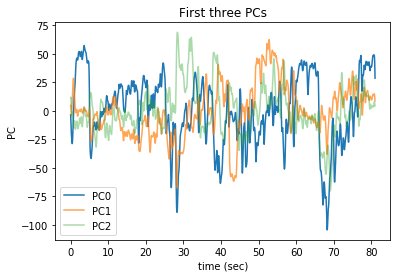

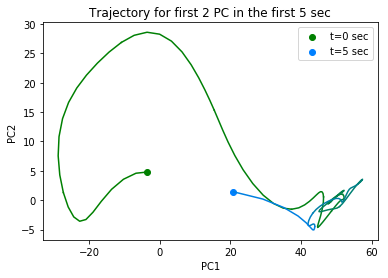

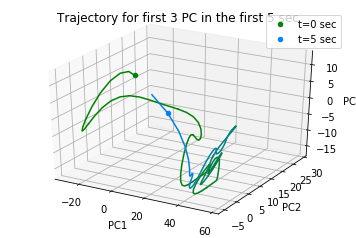

In [94]:
plot_all_PC('Gau_smoothed_005.npy', t_end=150)